<a href="https://colab.research.google.com/github/yigitpala/sampledatasets/blob/master/2_Quality_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import fancyimpute
import matplotlib.pyplot as plt
import missingno as mn
import numpy as np
import pandas as pd

import io
import urllib.request as req
import zipfile

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
Using TensorFlow backend.


In [2]:
# https://www.kaggle.com/kaggle/kaggle-survey-2018
url = 'https://github.com/mattharrison/datasets/raw/master/data/kaggle-survey-2018.zip'
fin = req.urlopen(url)

with zipfile.ZipFile(io.BytesIO(fin.read())) as z:
    print(z.namelist())
    kag = pd.read_csv(z.open('multipleChoiceResponses.csv'))
    kag_questions = kag.iloc[0]
    df = kag.iloc[1:]

['multipleChoiceResponses.csv', 'freeFormResponses.csv', 'SurveySchema.csv']


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,Q7_OTHER_TEXT,Q8,Q9,Q10,Q11_Part_1,Q11_Part_2,Q11_Part_3,Q11_Part_4,Q11_Part_5,Q11_Part_6,Q11_Part_7,Q11_OTHER_TEXT,Q12_MULTIPLE_CHOICE,Q12_Part_1_TEXT,Q12_Part_2_TEXT,Q12_Part_3_TEXT,Q12_Part_4_TEXT,Q12_Part_5_TEXT,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,...,Q46,Q47_Part_1,Q47_Part_2,Q47_Part_3,Q47_Part_4,Q47_Part_5,Q47_Part_6,Q47_Part_7,Q47_Part_8,Q47_Part_9,Q47_Part_10,Q47_Part_11,Q47_Part_12,Q47_Part_13,Q47_Part_14,Q47_Part_15,Q47_Part_16,Q48,Q49_Part_1,Q49_Part_2,Q49_Part_3,Q49_Part_4,Q49_Part_5,Q49_Part_6,Q49_Part_7,Q49_Part_8,Q49_Part_9,Q49_Part_10,Q49_Part_11,Q49_Part_12,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,0,NaN,NaN,I do not know,Analyze and understand data to influence produ...,Build and/or run a machine learning service th...,Build and/or run the data infrastructure that ...,NaN,Do research that advances the state of the art...,NaN,NaN,-1,"Cloud-based data software & APIs (AWS, GCP, Az...",-1,-1,-1,-1,0,-1,Jupyter/IPython,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,-1,5-10,"10-20,000",No (we do not use ML methods),NaN,NaN,NaN,NaN,NaN,None of these activities are an important part...,NaN,-1,"Basic statistical software (Microsoft Excel, G...",1,-1,-1,-1,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,-1,0-1,"0-10,000",I do not know,Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,NaN,NaN,-1,Local or hosted development environments (RStu...,-1,-1,-1,0,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,MATLAB,NaN,NaN,NaN,NaN,...,10-20,NaN,Examine feature correlations,Examine feature importances,NaN,NaN,NaN,NaN,Plot predicted vs. actual results,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I am confident that I can explain the outputs ...,NaN,NaN,NaN,NaN,NaN,NaN,Make sure the code is human-readable,Define all random seeds,NaN,Include a text file describing all dependencies,NaN,NaN,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,Local or hosted development environments (RStu...,-1,-1,-1,1,-1,-1,Jupyter/IPython,RStudio,PyCharm,NaN,NaN,NaN,NaN,Visual Studio,NaN,NaN,Vim,...,20-30,NaN,Examine feature correlations,Examine feature importances,Plot decision boundaries,NaN,NaN,NaN,Plot predicted vs. actual results,NaN,Sensitivity analysis/perturbation importance,NaN,NaN,NaN,NaN,NaN,NaN,"Yes, most ML models are ""black boxes""",NaN,NaN,"Share data, code, and environment using a host...",NaN,NaN,NaN,Make sure the code is human-readable,NaN,Define relative rather than absolute file paths,NaN,NaN,NaN,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1
5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,-1,0-1,"0-10,000",I do not know,NaN,NaN,NaN,NaN,NaN,NaN,Other,-1,"Advanced statistical software (SPSS, SAS, etc.)",-1,1,-1,-1,-1,-1,NaN,RStudio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20-30,NaN,NaN,NaN,NaN,Create partial dependence plots,NaN,NaN,NaN,NaN,

In [7]:
df.dtypes

Time from Start to Finish (seconds)    object
Q1                                     object
Q1_OTHER_TEXT                          object
Q2                                     object
Q3                                     object
                                        ...  
Q50_Part_5                             object
Q50_Part_6                             object
Q50_Part_7                             object
Q50_Part_8                             object
Q50_OTHER_TEXT                         object
Length: 395, dtype: object

In [8]:
# Missing values
df.isna()

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,Q7_OTHER_TEXT,Q8,Q9,Q10,Q11_Part_1,Q11_Part_2,Q11_Part_3,Q11_Part_4,Q11_Part_5,Q11_Part_6,Q11_Part_7,Q11_OTHER_TEXT,Q12_MULTIPLE_CHOICE,Q12_Part_1_TEXT,Q12_Part_2_TEXT,Q12_Part_3_TEXT,Q12_Part_4_TEXT,Q12_Part_5_TEXT,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,...,Q46,Q47_Part_1,Q47_Part_2,Q47_Part_3,Q47_Part_4,Q47_Part_5,Q47_Part_6,Q47_Part_7,Q47_Part_8,Q47_Part_9,Q47_Part_10,Q47_Part_11,Q47_Part_12,Q47_Part_13,Q47_Part_14,Q47_Part_15,Q47_Part_16,Q48,Q49_Part_1,Q49_Part_2,Q49_Part_3,Q49_Part_4,Q49_Part_5,Q49_Part_6,Q49_Part_7,Q49_Part_8,Q49_Part_9,Q49_Part_10,Q49_Part_11,Q49_Part_12,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,True,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,True,True,True,True,...,False,True,False,False,True,True,True,True,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,False,False,True,False,True,True,False,True,False,True,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,True,True,False,...,False,True,False,False,False,True,True,True,False,True,False,True,True,True,True,True,True,False,True,True,False,True,True,True,False,True,False,True,True,True,False,True,True,False,True,False,True,True,True,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,...,False,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,False,True,True,True,False,True,False,True,True,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23855,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,True,True,False,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,False
23856,False,False,False,False,False,False,False,True,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,False,False,False,False,F

In [10]:
df.isna().sum()

Time from Start to Finish (seconds)        0
Q1                                         0
Q1_OTHER_TEXT                              0
Q2                                         0
Q3                                         0
                                       ...  
Q50_Part_5                             20290
Q50_Part_6                             22800
Q50_Part_7                             21359
Q50_Part_8                             23339
Q50_OTHER_TEXT                             0
Length: 395, dtype: int64

In [11]:
df.isna().mean() * 100

Time from Start to Finish (seconds)     0.000000
Q1                                      0.000000
Q1_OTHER_TEXT                           0.000000
Q2                                      0.000000
Q3                                      0.000000
                                         ...    
Q50_Part_5                             85.041284
Q50_Part_6                             95.561423
Q50_Part_7                             89.521774
Q50_Part_8                             97.820529
Q50_OTHER_TEXT                          0.000000
Length: 395, dtype: float64

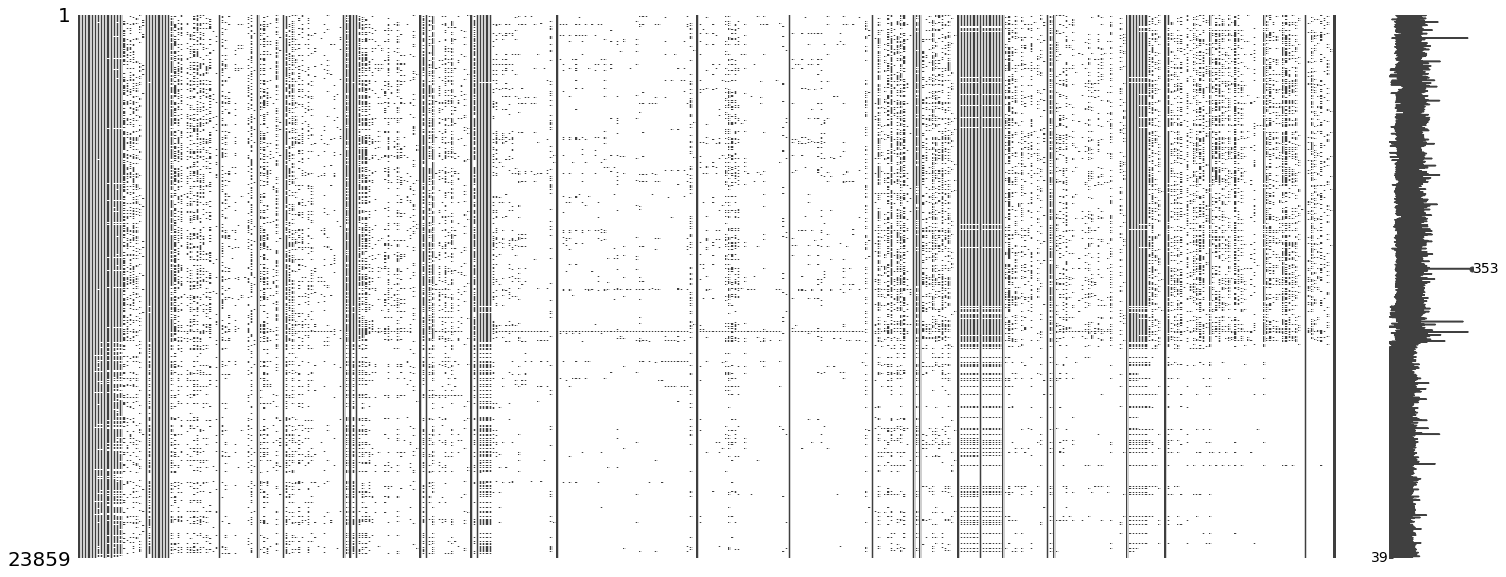

In [12]:
mn.matrix(df)

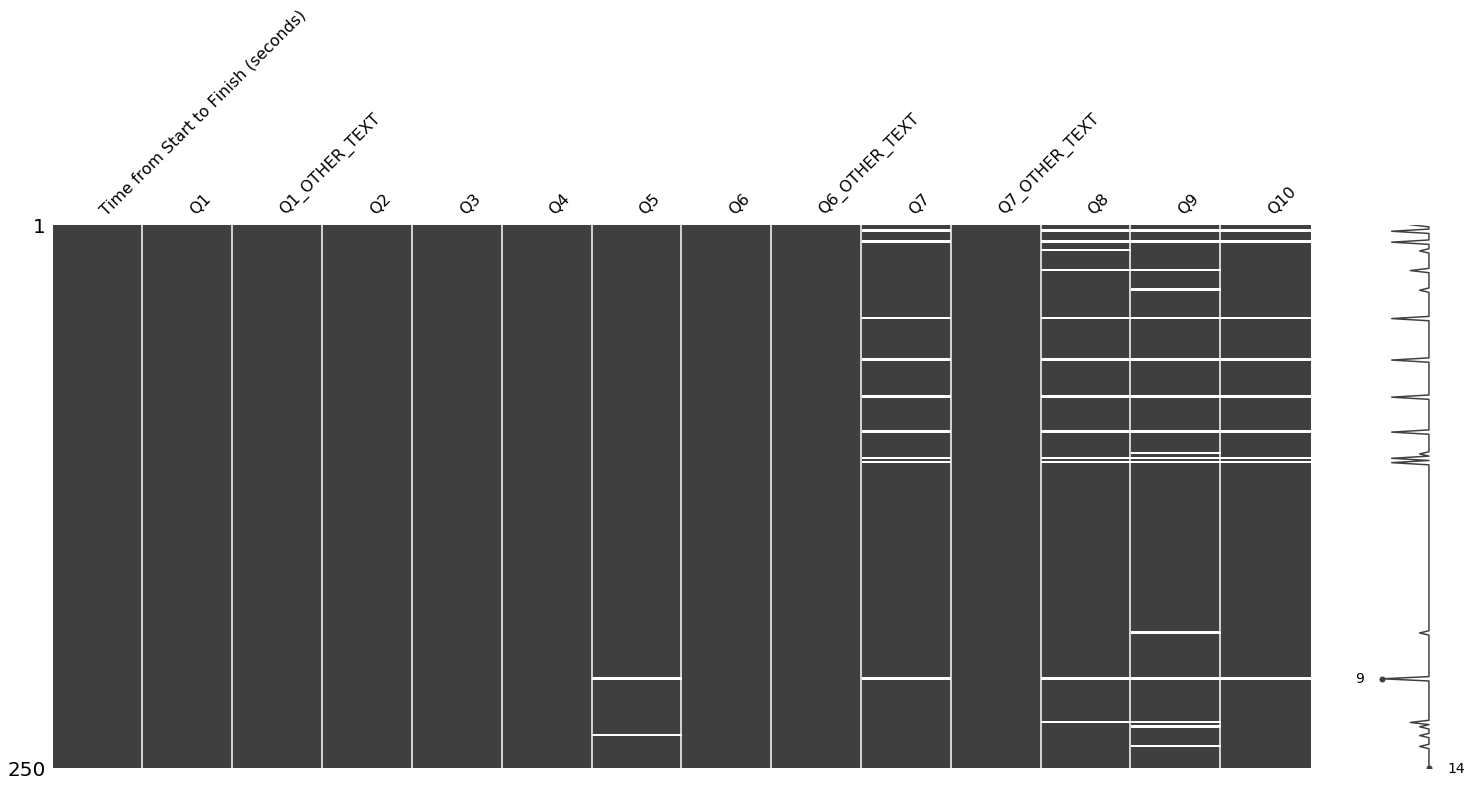

In [13]:
mn.matrix(df.iloc[:250,:14])

In [0]:
# options for missing values
# .dropna()
# .fillna(val)
# .col.interpolate()  [For numeric]

In [23]:
# use .value_counts to inspect object type data
df.Q1.value_counts(dropna=False)

Male                       19430
Female                      4010
Prefer not to say            340
Prefer to self-describe       79
Name: Q1, dtype: int64

In [24]:
df.Q1.replace({'Prefer not to say': 'Other',
               'Prefer to self-describe': 'Other'}).value_counts()

Male      19430
Female     4010
Other       419
Name: Q1, dtype: int64

In [25]:
# Eventually will use get_dummies when applying ML
pd.get_dummies((df.Q1
  .replace({'Prefer not to say': 'Another',
               'Prefer to self-describe': 'Another'})
), drop_first=True)

,Female,Male
1,1,0
2,0,1
3,1,0
4,0,1
5,0,1
...,...,...
23855,0,1
23856,1,0
23857,0,1
23858,0,1


In [26]:
df.Q2

1        45-49
2        30-34
3        30-34
4        35-39
5        22-24
         ...  
23855    45-49
23856    25-29
23857    22-24
23858    25-29
23859    25-29
Name: Q2, Length: 23859, dtype: object

In [27]:
df.Q2.value_counts(dropna=False)

25-29    6159
22-24    5141
30-34    3776
18-21    3037
35-39    2253
40-44    1360
45-49     858
50-54     582
55-59     328
60-69     273
70-79      53
80+        39
Name: Q2, dtype: int64

In [28]:
df.Q2.str.slice(0,2)

1        45
2        30
3        30
4        35
5        22
         ..
23855    45
23856    25
23857    22
23858    25
23859    25
Name: Q2, Length: 23859, dtype: object

In [0]:
df.Q2.str.slice(0,2).astype(int).rename('Q2_age')

In [0]:
# Look at age distributions
df.Q2.str.slice(0,2).astype(int).rename('Q2_age').value_counts()

In [0]:
df.Q3.value_counts(dropna=False)

In [0]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'
df.Q3.apply(limit_countries)

In [0]:
df.Q4.value_counts(dropna=False)

In [0]:
(df.Q4
 .replace({'Master’s degree': 18,
 'Bachelor’s degree': 16,
 'Doctoral degree': 20,
 'Some college/university study without earning a bachelor’s degree': 13,
 'Professional degree': 19,
 'I prefer not to answer': None,
 'No formal education past high school': 12})
 .fillna(11)
 .rename('Q4_edu')
)

In [0]:
(df.Q4
 .replace({'Master’s degree': 18,
 'Bachelor’s degree': 16,
 'Doctoral degree': 20,
 'Some college/university study without earning a bachelor’s degree': 13,
 'Professional degree': 19,
 'I prefer not to answer': None,
 'No formal education past high school': 12})
 .fillna(11)
 .rename('Q4_edu')
).value_counts()

In [0]:
(df.Q4
 .replace({'Master’s degree': 18,
 'Bachelor’s degree': 16,
 'Doctoral degree': 20,
 'Some college/university study without earning a bachelor’s degree': 13,
 'Professional degree': 19,
 'I prefer not to answer': None,
 'No formal education past high school': 12})
 .fillna(11)
 .rename('Q4_edu')
).hist()

In [0]:
df.Q5.value_counts()

In [0]:
def only_cs_stat_val(val):
    if val not in {'cs', 'eng', 'stat'}:
        return 'other'
    return val

(df.Q5.replace({
        'Computer science (software engineering, etc.)': 'cs',
        'Engineering (non-computer focused)': 'eng',
        'Mathematics or statistics': 'stat'})
 .apply(only_cs_stat_val))

In [0]:
def only_cs_stat_val(val):
    if val not in {'cs', 'eng', 'stat'}:
        return 'other'
    return val

(df.Q5.replace({
        'Computer science (software engineering, etc.)': 'cs',
        'Engineering (non-computer focused)': 'eng',
        'Mathematics or statistics': 'stat'})
 .apply(only_cs_stat_val)).value_counts()

In [0]:
df.Q6.value_counts()

In [0]:
def limit_occupation(val):
    if val in {'Student', 'Data Scientist', 'Software Engineer', 'Not employed',
              'Data Engineer'}:
        return val
    return 'Another'

df.Q6.apply(limit_occupation).value_counts()

In [0]:
# Years experience
df.Q8.value_counts(dropna=False)

In [0]:
(df.Q8
  .str.replace('+', '')
  .str.split('-', expand=True)
  .iloc[:,0]
  .fillna(-1)
  .astype(int)
).value_counts()

In [0]:
# Compensation
df.Q9.value_counts(dropna=False)

In [0]:
na_mask = df.Q9.isna()
hide_mask = df.Q9.str.startswith('I do not').fillna(False)
df[na_mask | hide_mask].Q6.value_counts()

In [0]:
# Plan - remove missing numbers pull out first part
na_mask = df.Q9.isna()
hide_mask = df.Q9.str.startswith('I do not').fillna(False)
(df.Q9
 [(~na_mask) & (~hide_mask)]
 .str.replace('+','')
 .str.replace(',','')
 .str.replace('500000', '500')
 .str.replace('I do not wish to disclose my approximate yearly compensation','')
 .str.split('-', expand=True)
 .iloc[:,0]
 .astype(int)
 .mul(1000)
 .rename('Q9_salary'))

In [0]:
def tweak_kag(df):
    na_mask = df.Q9.isna()
    hide_mask = df.Q9.str.startswith('I do not').fillna(False)
    df = df[~na_mask & ~hide_mask]
    
    q1 = (df.Q1
      .replace({'Prefer not to say': 'Another',
               'Prefer to self-describe': 'Another'})
      .rename('Gender')
    )
    q2 = df.Q2.str.slice(0,2).astype(int).rename('Age')
    def limit_countries(val):
        if val in  {'United States of America', 'India', 'China'}:
            return val
        return 'Another'
    q3 = df.Q3.apply(limit_countries).rename('Country')
   
    q4 = (df.Q4
     .replace({'Master’s degree': 18,
     'Bachelor’s degree': 16,
     'Doctoral degree': 20,
     'Some college/university study without earning a bachelor’s degree': 13,
     'Professional degree': 19,
     'I prefer not to answer': None,
     'No formal education past high school': 12})
     .fillna(11)
     .rename('Edu')
    )
    
    def only_cs_stat_val(val):
        if val not in {'cs', 'eng', 'stat'}:
            return 'another'
        return val

    q5 = (df.Q5
            .replace({
                'Computer science (software engineering, etc.)': 'cs',
                'Engineering (non-computer focused)': 'eng',
                'Mathematics or statistics': 'stat'})
             .apply(only_cs_stat_val)
             .rename('Studies'))
    def limit_occupation(val):
        if val in {'Student', 'Data Scientist', 'Software Engineer', 'Not employed',
                  'Data Engineer'}:
            return val
        return 'Another'

    q6 = df.Q6.apply(limit_occupation).rename('Occupation')
    
    q8 = (df.Q8
      .str.replace('+', '')
      .str.split('-', expand=True)
      .iloc[:,0]
      .fillna(-1)
      .astype(int)
      .rename('Experience')
    )
    
    q9 = (df.Q9
     .str.replace('+','')
     .str.replace(',','')
     .str.replace('500000', '500')
     .str.replace('I do not wish to disclose my approximate yearly compensation','')
     .str.split('-', expand=True)
     .iloc[:,0]
     .astype(int)
     .mul(1000)
     .rename('Salary'))
    return pd.concat([q1, q2, q3, q4, q5, q6, q8, q9], axis=1)

tweak_kag(df)